In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

def get_ordered_colors(cmap, n, lb=0, ub=1):
    cmap = cm.get_cmap(cmap)
    return cmap(np.linspace(lb, ub, n))

Our aim here is to investigate the circumstances under which recurrent inhibition can narrow and perhaps stabilize the range of possible propagation speeds of a feedforward excitatory network.

Let's begin by considering a single LIF neuron embedded in an excitatory layer of cells within the feedforward network.

### LIF neuron governing equation

A current-based LIF neuron has the following governing equation:

$$ \tau \dot{V}(t) = -V(t) + \frac{\tau}{C} I(t) $$

The solution has the general form:

$$ V(t) = V_0 + \frac{1}{C} \int_{0}^{t} I(t') e^{-(t-t')/ \tau } dt' $$

When driven with constant current $I_0$, the voltage is:

$$ V(t) = V_0 + \frac{I_0}{C} \int_{0}^{t} e^{-(t-t')/ \tau } dt' \\
        = V_0 + \frac{I_0 \tau}{C} (1 - e^{-t/\tau}) $$
        

### Dynamics of an excitatory cell receiving feedforward excitation and global inhibition

Suppose a neuron has been driven for a long time with current $I_{i}$, representing the global inhibition supplied by the inhibitory pool given steady-state propagating dynamics of the chain:

$$ V(t) = V = V_0 + \frac{I_i \tau}{C} $$

At time $t_0$, the excitation propagating along the chain begins to excite the neuron in question. Introduce a new component to the input current, $I_e$ such that $I(t > t_0) = I_i + I_e$:

$$ V(t > t_0) = V_0 + \frac{I_i \tau}{C} + \frac{I_e \tau}{C} (1 - e^{-t/\tau}) $$

To calculate time-to-threshold, solve:

$$ V_{th} = V_0 + \frac{I_i \tau}{C} + \frac{I_e \tau}{C} (1 - e^{-t^*/\tau}) $$

$$ (1 - e^{-t^*/\tau}) = \left(V_{th} - V_0 - \frac{I_i \tau}{C}\right) \frac{C}{\tau I_e} $$

$$ t^* = - \tau \log\left(1 - \frac{C}{\tau I_e} \left(V_{th} - V_0 - \frac{I_i \tau}{C}\right)\right) $$

### Model of the inhibitory pool

We have not yet specified the coupling from the excitatory cells to the inhibitory pool and back yet, but let us assume that E cells are coupled to I cells with sufficient strength so that individual spikes from E cells always evoke spikes from their coupled I cells. In this limit, the frequency of spikes in an I cell is linear with the frequency of spikes of an E cell that drives it, i.e. a firing rate approximation is suitable.

If we further assume that coupling from I cells to E cells in the chain is global and uniform, then $I_i(t)$ is a linear function of $I_e(t)$ with some time lag.

For ease of calculation, let us assume $I_i(t) = A I_e(t)$, where $A < 0$. We then have:

$$ t^* = -\tau \log\left[1 - \frac{C}{\tau I_e(t)} \left(V_{th} - V_0 - \frac{\tau A I_e(t)}{C}\right)\right] \\ 
        = -\tau \log\left[1 - \left(\frac{C \left(V_{th} - V_0 \right) }{\tau I_e(t)} - A\right)\right] $$


Let us define $\alpha = C \left(V_{th} - V_0 \right) / \tau$ and simplify a bit:

$$ t^*  = -\tau \log\left[1 + A - \frac{\alpha}{I_e(t)}\right] $$

Here, $A < 0$, $\alpha > 0$, and $I_e(t) \geq 0$ by definition.

<IPython.core.display.Javascript object>


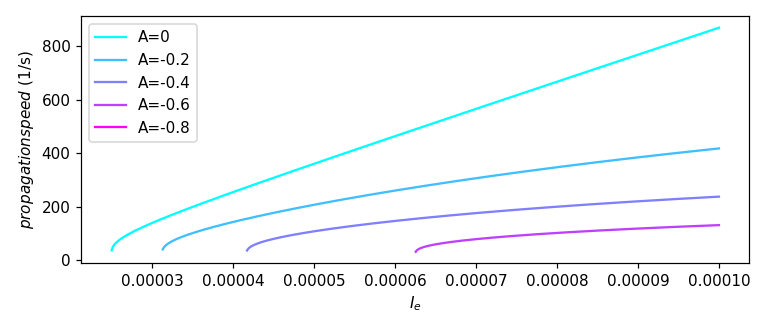

Text(0.5, 0, '$I_e$')

In [6]:
tau = 4e-3
c = 1e-6
v_th = -0.5
v_0 = -0.6

alpha = c / tau * (v_th - v_0)

def t_star(a, i_e):
    return -tau * np.log(1 + a - alpha / i_e)

def prop_speed(a, i_e):
    return 1/t_star(a, i_e)

fig, ax = plt.subplots(1, 1, figsize=(7, 3), tight_layout=True)

i_e = np.linspace(1e-8, 0.1e-3, 1000)

colors = get_ordered_colors('cool', 5)

for i, a in enumerate([0, -0.2, -.4, -.6, -.8]):
    ax.plot(i_e, prop_speed(a, i_e), c=colors[i], label=f'A={a}')
ax.legend()
ax.set_ylabel(r'$propagation speed$ (1/s)')
ax.set_xlabel(r'$I_e$')

### Structured inhibition

For a structured inhibiton network, we can repeat our calculations above, but now assume that at time $t > t_0$, the current is simply $I_e(t)$ because the structure of the inhibition will shield the neurons being excited from inhibition at time $t_0$ and a short while after. We then have:

$$ V_{th} = V_0 + \frac{I_i \tau}{C} e^{-(t^* + \Delta t)/\tau} + \frac{I_e \tau}{C} (1 - e^{-t^*/\tau}) $$

$$ V_{th} - V_0 = \frac{\tau (I_i e^{-\Delta t/\tau} - I_e)}{C} e^{-t^*/\tau} + \frac{I_e \tau}{C} $$



$$ \frac{C(V_{th} - V_0)}{\tau} - I_e = (I_i e^{-\Delta t/\tau} - I_e) e^{-t^*/\tau}$$

Set $I_i = A I_e$ where $A < 0$:

$$ \frac{1}{I_e (A e^{-\Delta t/\tau} - 1)} \left( \frac{C(V_{th} - V_0)}{\tau} - I_e \right) = e^{-t^*/\tau}$$

$$ -\tau \log \left[ \frac{1}{I_e (A e^{-\Delta t/\tau} - 1)} \left( \frac{C(V_{th} - V_0)}{\tau} - I_e \right) \right] = t^* $$


$$ t^* = -\tau \log \left[ \frac{1}{1 - A e^{-\Delta t/\tau}} \left(1 -  \frac{C(V_{th} - V_0)}{\tau I_e} \right) \right] $$

<IPython.core.display.Javascript object>


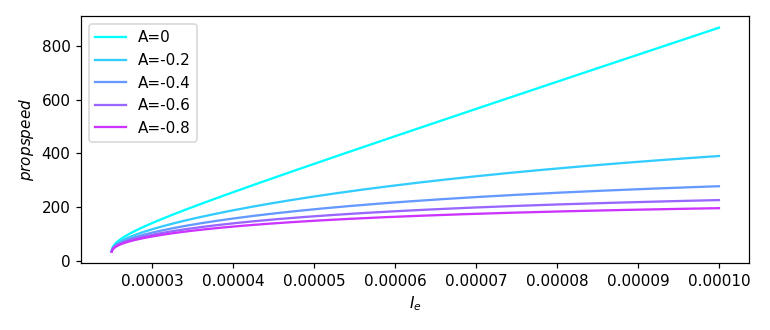

Text(0.5, 0, '$I_e$')

In [7]:
delta_t = -3e-3

def t_star_structed(a, i_e):
    return -tau * np.log((1 - alpha / i_e) / (1 - a * np.exp(-delta_t / tau)))

def prop_speed_structed(a, i_e):
    return 1 / t_star_structed(a, i_e)

fig, ax = plt.subplots(1, 1, figsize=(7, 3), tight_layout=True)

colors = get_ordered_colors('cool', 6)

for i, a in enumerate([0, -0.2, -.4, -.6, -.8]):
    ax.plot(i_e, prop_speed_structed(a, i_e), c=colors[i], label=f'A={a}')
ax.legend()
ax.set_ylabel(r'$prop speed$')
ax.set_xlabel(r'$I_e$')

### Comparison of structured and unstructured networks with recurrence tuned so that neurons will activate at the same minimum current

<IPython.core.display.Javascript object>


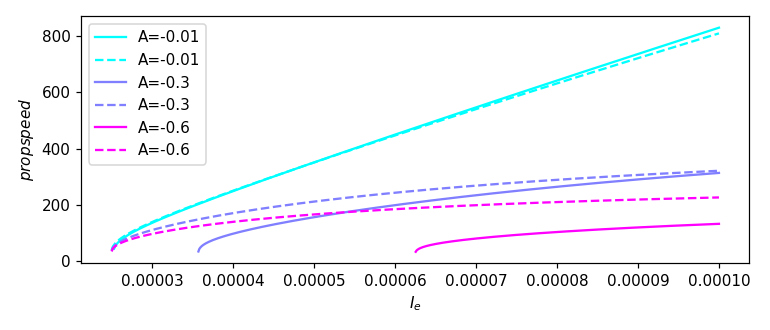

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3), tight_layout=True)

colors = get_ordered_colors('cool', 3)

for i, a in enumerate([-0.01, -0.3, -.6]):
    ax.plot(i_e, prop_speed(a, i_e), c=colors[i], label=f'A={a}')
    ax.plot(i_e, prop_speed_structed(a, i_e), '--', c=colors[i], label=f'A={a}')

ax.set_ylabel('$prop speed$')
ax.set_xlabel(r'$I_e$')
ax.legend()